# DBSCAN - Density-based spatial clustering of applications with noise
# Алгоритм для кластеризации данных и поиска выбросов

## Ключевые идеи алгоритма DBSCAN
* DBSCAN использует плотность точек для назначения номеров кластеров
* Может выполнять сегментацию данных в таких случаях, когда другие алгоритмы не могут хорошо это сделать

Для примера рассмотрим следующие данные:

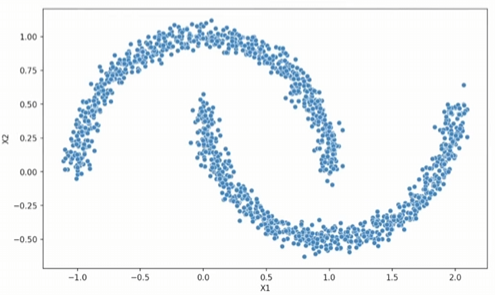

Такие данные называют moons dataset. Многие алгоритмы кластеризации не смогут обнаружить здесь два набора точек.

Если посмотреть на расстояния - конечные точки этих полумесяцев находятся достаточно близко к соседнему кластеру точек, что может сбивать с толку многие алгоритмы кластеризации:

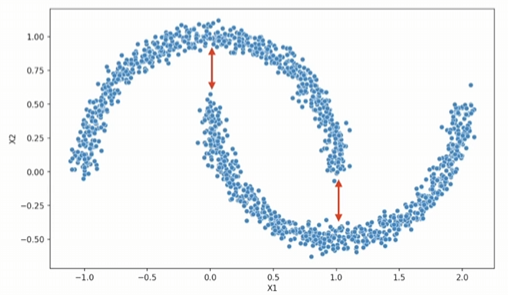

Также можно сказать и про ближайшие части этих двух кластеров - они находятся близко друг к другу:

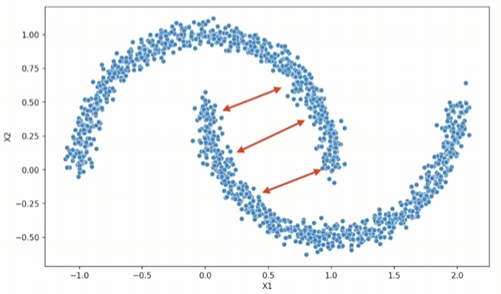

Если воспользоваться алгоритмом K-средних для поиска двух кластеров точек, то получится вот такой результат:

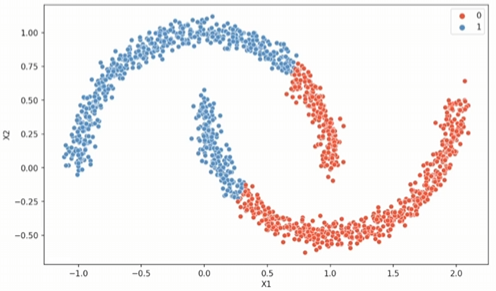

Причина этого заключается в том, что используются метрики расстояния, а не метрики **плотности точек**.

Если же применить алгоритм DBSCAN с нужными гиперпараметрами, то результат определения двух наборов точек будет следующий:

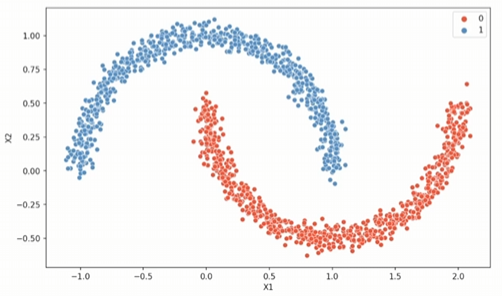

## Как работает DBSCAN

DBSCAN выполняет итерации по точкам, используя два ключевых гиперпараметра (эпсилон и минимальное количество точек) для назначения кластеров. В отличие от K-Means, DBSCAN в качестве основной метрики использует **плотность точек**.

**Основные параметры DBSCAN:**
* Эпсилон - расстояние (окрестность) вокруг точки
* Минимальное количество точек - минимальное количество точек в эпсилон-окрестности точки

## Типы точек в алгоритме DBSCAN:
* Core
* Border
* Outlier

Для примера рассмотрим следующий набор данных:

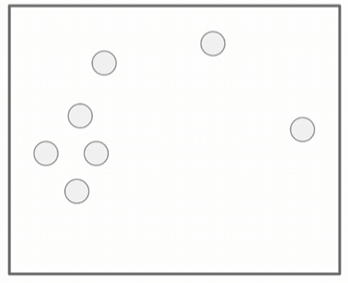

**Точки Core** - в самом начале алгоритм DBSCAN случайным образом выьирает некоторую одну точку:

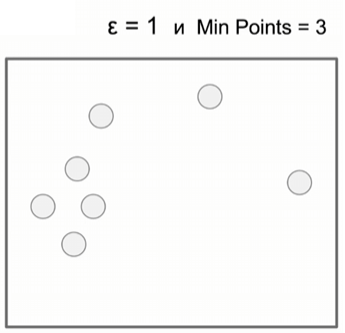

Если в $\varepsilon$-окрестности точки содержится более чем минимально количество точек, в нашем примере более чем две точки, то такая точка называется **Core точкой**:

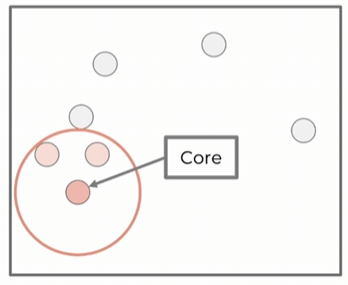

**Разные версии алгоритма DBSCAN либо включают, либо не включают саму точку в подсчёт минимального количества точек!**

**Точки Border** - точки, которые находятся в $\varepsilon$-окрестности от **Core точки**, однако они сами, в своей окрестности, не содержат минимальное количество точек.

Если взять следующую **Core точку**:

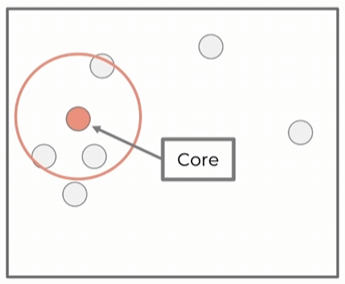

В её окрестности есть четыре точки, если считать её саму, но если посмотреть на точку - 

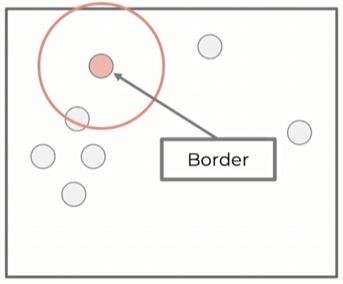

Она является **Border точкой**, потому что она находится в $\varepsilon$-окрестности от **Core точки**, но в её собственной окрестности не содержится минимальное количество точек (в нашем случае три):

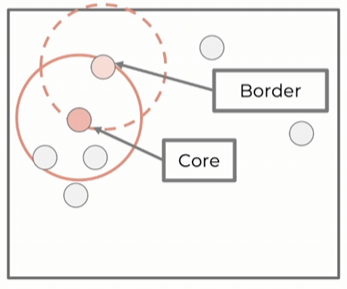

Здесь всего две точки.

**Важно значения гиперпараметров эпсилон и минимальное количество точек - устанавливаются перед обучением модели! Во время обучения они уже не меняются.**

**Точки Outlier** - такие точки, до которых нельзя "добраться" с помощью итераций по точкам. Точки **Core** и **Border** находятся рядом друг с другом, поэтому в процессе итераций они будут отнесены к одному и тому же кластеру. Если же какая-то точка находится далеко от всех других точек, то DBSCAN скажет, что это шум - потому что точка находится слишком далеко от других точек, чтобы принадлежать к какому-то кластеру:

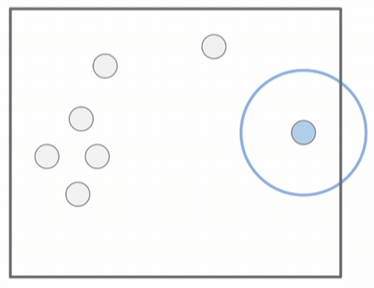

Таким образом, DBSCAN автоматически находит выбросы.

## Процесс присвоения кластеров точкам

Шаги алгоритма DBSCAN:
* Берём случайную точку, которая ещё не принадлежит ни к одному кластеру
* Определяем тип этой точки (core/border/outlier), для этого подсчитывается количество точек в $\varepsilon$-окрестности от этой точки
* Если в $\varepsilon$-окрестности была найдена **Core точка**, то все ближайшие точки добавляются в тот же кластер, к которому относится **Core точка**
* Этот процесс повторяется до тех пор, пока все точки либо не будут включены в кластеры, либо не будут обозначены как выбросы

**Важно: в кластерах оказываются точки с типами **Core** и **Border**, но это не значит, что **Core** и **Border** - это два разных кластера. Это разные типы точек в одном и том же кластере.**

## Ключевые гиперпараметры

Меняя гиперпараметры, мы:
1) Меняем количество кластеров
2) Влияем на определение точек-выбросов

Для примера рассмотрим следующий набор данных:

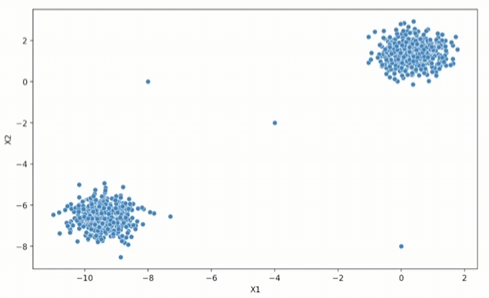

Большинство точек находится в двух больших скоплениях, а также в середине графика есть три явных выброса.

Если запустить алгоритм DBSCAN со значениями по умолчанию, то он найдёт шесть точек выбросов:

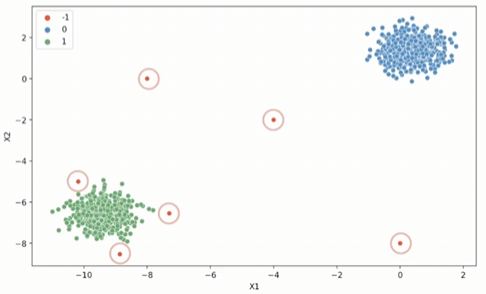

Хотя скорее всего, хотелось бы включить три точки, которые находятся внизу слева в зелёный кластер. Поэтому надо подобрать значение $\varepsilon$ таким образом, чтобы выбросами считались только три точки в середине этого графика

### Как работает параметр эпсилон

Чем больше значение эпсилон, тем большее количество точек получится отнести к **Core точкам** и **Border точкам**, потому что с помощью большей окружности получится дальше дотянуться от одних точек до других. В результате, также уменьшается количество выбросов.

**Если значение эпсилон будет слишком большим, то все точки будут в окрестности друг друга и попадут в один кластер.**

При уменьшении значения эпсилон, получается, что меньшее количество точек находится "близко" друг к другу, следовательно, количество кластеров будет увеличиваться.

**Если значение эпсилон будет слишком маленьким, то мы не сможем дотянуться до соседних точек, поэтому не будет возможности двигаться от одной точки к другой, чтобы добавить их в уже имеющийся кластер. Вместо этого, каждый раз, будет создаваться новый кластер.**

Чтобы **найти значение эпсилон** можно попробовать метод локтя - попробовать несколько моделей DBSCAN с различным эпсилон, измеряя:
* Количество кластеров
* Количество точек-выбросов
* Процент точек-выбросов

---

**ВАЖНО**  
Эти результаты будут очень сильно зависеть от конкретных данных и предметной области - нужно интуитивное понимание того, какой процент точек выбросов считать допустимым, а также, какое количество кластеров считать приемлемым.

---

Результаты для различных значений эпсилон наносятся на график, который во многих задачах будет выглядеть следующим образом:

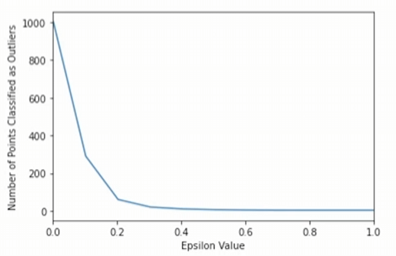

Здесь по горизонтали отложено значение эпсилон, а по вертикали - количество точек, классифицированных как выбросы. Когда эпсилон слишком мал - мы не можем дотянуться до соседних точек, поэтому многие точки выглядят как выбросы. При увеличении эпсилон количество выбросов существенно снижается. Если же сделать эпсилон слишком большим - получим нулевое количество выбросов, потому что получится дотянуться даже до самых дальних точек.

### Как работает параметр минимальное количество точек

При увеличении количества точек, которое требуется для обозначения **Core точки**, получается большее количество точек выбросов.

**Если минимально количество точек очень близко к общему количеству точек, то скорее всего все точки будут точками-выбросами.**

Выбрать этот параметр можно также, как и параметр эпсилон - протестировать различные значения, и померить количество/процент выбросов:

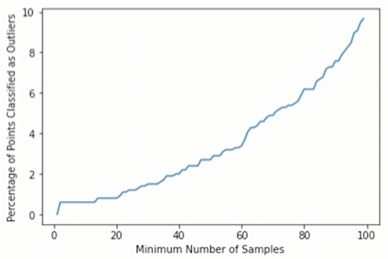

По горизонтальной оси откладывается минимальное количество точек, а по вертикальной оси - количество точек выбросов.

Иногда можно уменьшить минимальное количество точек, чтобы создать отдельные кластеры вместо точек выбросов:

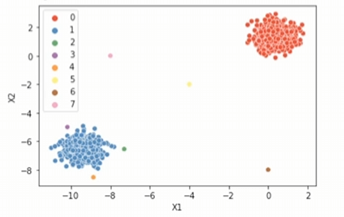

В данном примере, если подобрать некоторое минимальное количество точек, то можно будет получить эти точки не как выбросы, а как отдельные кластеры. Иногда это может пригодиться в некоторых задачах.